In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [14]:
initial = pd.read_csv('Patch-seq log - Mouse PatchSeq.csv')
ps = initial[['Date', 'Slice (Lims ID?)']]
ps['Date'] = ps['Date'].astype(int)
ps = ps[ps['Date'] > 171001]
ps['Date'] = pd.to_datetime(ps['Date'], format = '%y%m%d')
ps.head()

,Date,Slice (Lims ID?)
4017,2017-10-02,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350934.04.01
4018,2017-10-02,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350934.04.01
4019,2017-10-02,Chrna2-Cre_OE25;Ai14-351067.04.01
4020,2017-10-02,Chrna2-Cre_OE25;Ai14-351067.04.01
4021,2017-10-02,Chrna2-Cre_OE25;Ai14-351067.04.01


In [15]:
ps1 = ps.groupby(['Date', 'Slice (Lims ID?)']).size().reset_index(name = 'cells')
ps1.head()

,Date,Slice (Lims ID?),cells
0,2017-10-02,Chrna2-Cre_OE25;Ai14-351067.03.02,2
1,2017-10-02,Chrna2-Cre_OE25;Ai14-351067.04.01,4
2,2017-10-02,Chrna2-Cre_OE25;Ai14-351067.04.02,2
3,2017-10-02,Gad2-IRES-Cre;Ai14-350672.03.01,1
4,2017-10-02,Gad2-IRES-Cre;Ai14-350672.04.01,4


In [16]:
ps2 = ps1[['Date', 'cells']]
ps2

,Date,cells
0,2017-10-02,2
1,2017-10-02,4
2,2017-10-02,2
3,2017-10-02,1
4,2017-10-02,4
5,2017-10-02,1
6,2017-10-02,2
7,2017-10-02,1
8,2017-10-02,3
9,2017-10-03,3


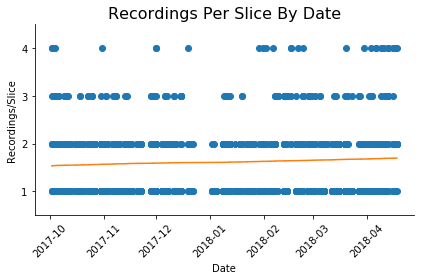

In [17]:
plt.plot(ps2['Date'], ps2['cells'], 'o')
plt.xticks(rotation = 45)
axes = plt.gca()
axes.set_ylim(0.5,4.5)
plt.yticks([1, 2, 3, 4])
plt.xlabel('Date')
plt.ylabel('Recordings/Slice')
plt.title('Recordings Per Slice By Date', loc = 'center', fontsize = 16)
sns.despine()
plt.tight_layout()

m, b = np.polyfit(ps2.index, ps2['cells'], 1)
plt.plot(ps2['Date'], m*ps2.index + b, '-')

plt.savefig('Recordings Per Slice.png')

In [18]:
ps_avg = ps1.groupby(['Date']).mean()
ps_avg.head()

,cells
Date,
2017-10-02,2.222222
2017-10-03,2.052632
2017-10-04,1.944444
2017-10-05,1.818182
2017-10-06,1.666667


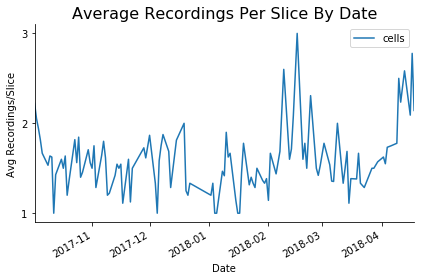

In [19]:
ps_avg.plot()
plt.yticks([1, 2, 3])
plt.xlabel('Date')
plt.ylabel('Avg Recordings/Slice')
plt.title('Average Recordings Per Slice By Date', loc = 'center', fontsize = 16)
sns.despine()
plt.tight_layout()
plt.savefig('Avg Recordings Per Slice.png')